# Walmart Sales Forecast

### Forecasting the sales of 45 Walmart stores by conducting Time Series Analysis using ARIMA.

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['text.color'] = 'k'

#### Reading dataset into pandas dataframe

In [3]:
sales_data = pd.read_csv('train.csv')
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


#### Creating sales date column

In [4]:
sales_data['Sales_date'] = sales_data.Date
sales_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Sales_date
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,2011-08-26
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,2011-03-25
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,2010-12-03
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,2010-09-17
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,2012-05-18


#### Checking start date and end date

In [5]:
sales_data['Sales_date'].min(), sales_data['Sales_date'].max()

('2010-02-05', '2012-10-26')

#### Drop above columns from dataframe

In [6]:
sales_data.drop(['Store','Date','Dept','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3',
                 'MarkDown4','MarkDown5','CPI','Unemployment','Type','Size'], axis=1, inplace=True)

sales_data.head()

,Weekly_Sales,Sales_date
0,87235.57,2011-08-26
1,5945.97,2011-03-25
2,1219.89,2010-12-03
3,11972.71,2010-09-17
4,8271.82,2012-05-18


#### Sorting sales data by Sales_date column

In [7]:
sales_data = sales_data.sort_values('Sales_date')
sales_data.head()

,Weekly_Sales,Sales_date
80235,10130.02,2010-02-05
8583,3798.40,2010-02-05
110078,4.96,2010-02-05
199024,47546.05,2010-02-05
199085,33057.95,2010-02-05


#### Creating datetime fromat column 

In [8]:
sales_data['datetime'] = pd.to_datetime(sales_data['Sales_date'], format = '%Y-%m-%d', errors='coerce')

sales_data.head()

,Weekly_Sales,Sales_date,datetime
80235,10130.02,2010-02-05,2010-02-05
8583,3798.40,2010-02-05,2010-02-05
110078,4.96,2010-02-05,2010-02-05
199024,47546.05,2010-02-05,2010-02-05
199085,33057.95,2010-02-05,2010-02-05


#### Dropping Sales_data column

In [9]:
sales_data.drop(columns='Sales_date', axis=1, inplace=True)
sales_data.head()

,Weekly_Sales,datetime
80235,10130.02,2010-02-05
8583,3798.40,2010-02-05
110078,4.96,2010-02-05
199024,47546.05,2010-02-05
199085,33057.95,2010-02-05


#### Checking format

In [10]:
sales_data.dtypes

Weekly_Sales           float64
datetime        datetime64[ns]
dtype: object

#### Setting index for datetime columns

In [11]:
sales_data = sales_data.groupby('datetime')['Weekly_Sales'].sum().reset_index()

In [12]:
sales_data = sales_data.set_index('datetime')
sales_data.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='datetime', length=143, freq=None)

#### Finding mean of weekly sales data by resampling to momthly frequency

In [13]:
monthly_sales = sales_data['Weekly_Sales'].resample('M').mean()

In [14]:
monthly_sales['2012':]

datetime
2012-01-31    2.778775e+07
2012-02-29    3.211715e+07
2012-03-31    3.101348e+07
2012-04-30    3.193377e+07
2012-05-31    3.187959e+07
2012-06-30    3.238922e+07
2012-07-31    3.107405e+07
2012-08-31    3.210573e+07
2012-09-30    3.067925e+07
2012-10-31    3.031781e+07
Freq: M, Name: Weekly_Sales, dtype: float64

#### Plotting monthly sales frequency

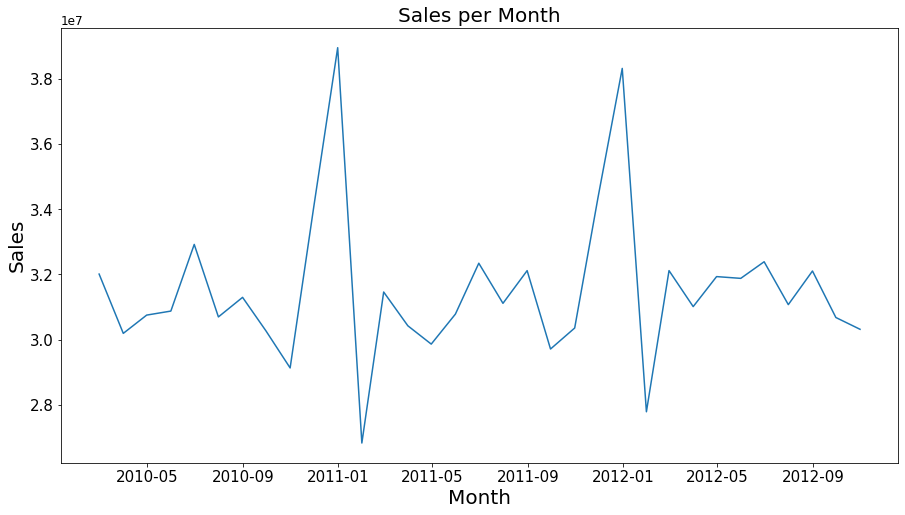

In [15]:
plt.figure(figsize=(15,8))
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.title('Sales per Month',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#monthly_sales.plot()
plt.plot(monthly_sales)
plt.show()

#### Decomposition plot of timeseries data

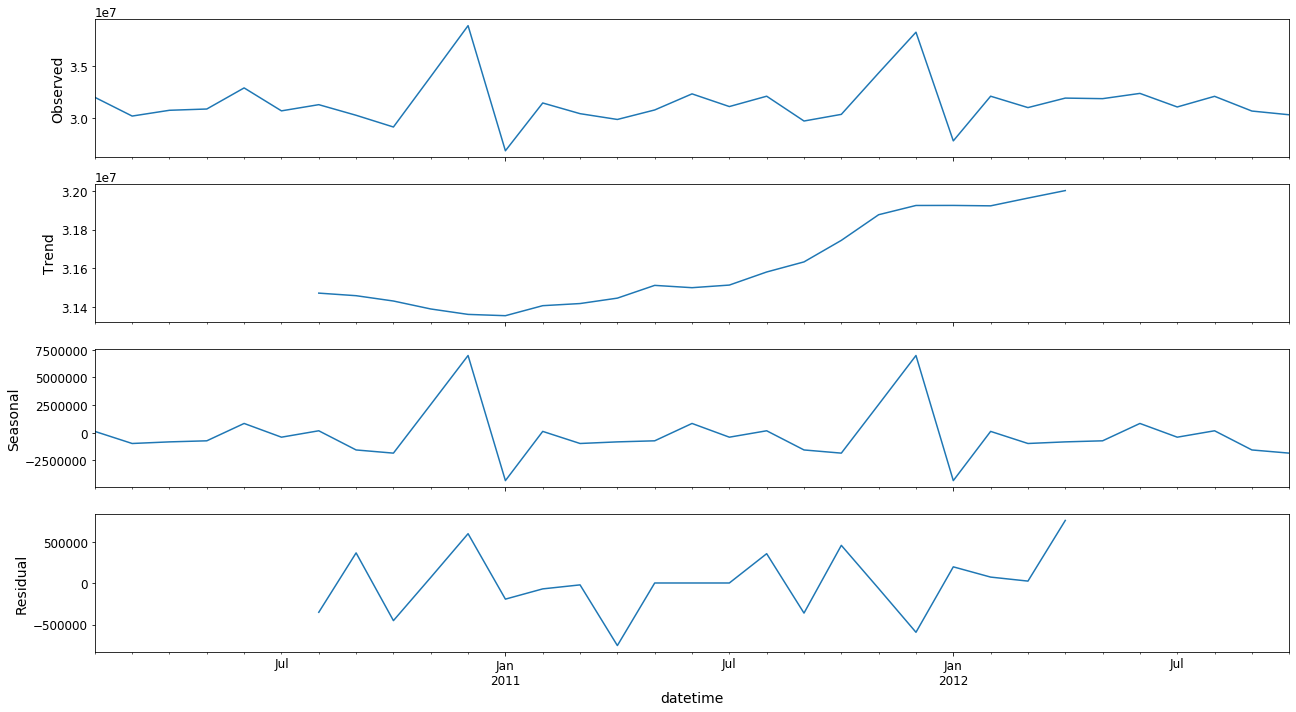

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition_plot = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
decomposition_plot.plot()
plt.show()

### There is a visible trend and seasonality in out data. These components has to removed from the model. Hence we will be using ARIMA model to conduct to analysis.

#### ARIMA model

In [17]:
a = b = c = range(0, 2)
abc = list(itertools.product(a, b, c))

seasonal_abc = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a,b,c))]
    
print('The combinations for Seasonal ARIMA Model are following:')
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[1]))
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[2]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[3]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[4]))

The combinations for Seasonal ARIMA Model are following:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Finding optimal set of parameters

In [18]:
for parameters in abc:
    for param_seasonal in seasonal_abc:
        try:
            model = sm.tsa.statespace.SARIMAX(monthly_sales,order=parameters,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(parameters, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1197.990946665313
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:604.645071835674
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:630.9441567414517
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:273.46373712835
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1141.698420965081
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:574.2478108268009
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:769.9669822252378
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:275.1674738288212
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1026.6993604477648
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:583.9337445613758
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:604.0178906006511
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:240.4663020324947
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:973.7203933609308
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:546.814383479271
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:639.5485570475337
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:243.81876991134845
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1060.7830343127926
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:602.9094433955119
ARIMA(1, 0,

### The combination of ARIMA(1, 1, 0)x(1, 1, 0, 12)12 has the lowest value of AIC = 214.33675750834465. Hence, ARIMA(1, 1, 0)x(1, 1, 0, 12)12 is be used as the optimal solution.

In [19]:
opt_model = sm.tsa.statespace.SARIMAX(monthly_sales,order=(1, 1, 0),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
result = opt_model.fit()
print(result.summary().tables[1])
result.summary()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.664      0.039      0.969      -1.276       1.328
ar.S.L12      -0.6134      0.557     -1.101      0.271      -1.705       0.478
sigma2      7.482e+11   4.18e-13   1.79e+24      0.000    7.48e+11    7.48e+11


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -104.168
Date:                            Mon, 11 May 2020   AIC                            214.337
Time:                                    16:54:30   BIC                            214.174
Sample:                                02-28-2010   HQIC                           212.331
                                     - 10-31-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.664      0.039      0.969      -1.276       1.328
ar.S.L12      -0.6134      0.557     -1.101      0.271      -1.705       0.478
sigma2      7.482e+11   4.18e-13   1.79e+24      0.000    7.48e+11    7.48e+11
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.94
Prob(Q):                               nan   Prob(JB):                         0.62
Heteroskedasticity (H):               0.03   Skew:                            -0.89
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+39. Standard errors may be unstable.
"""

#### Plotting diagnostics results 

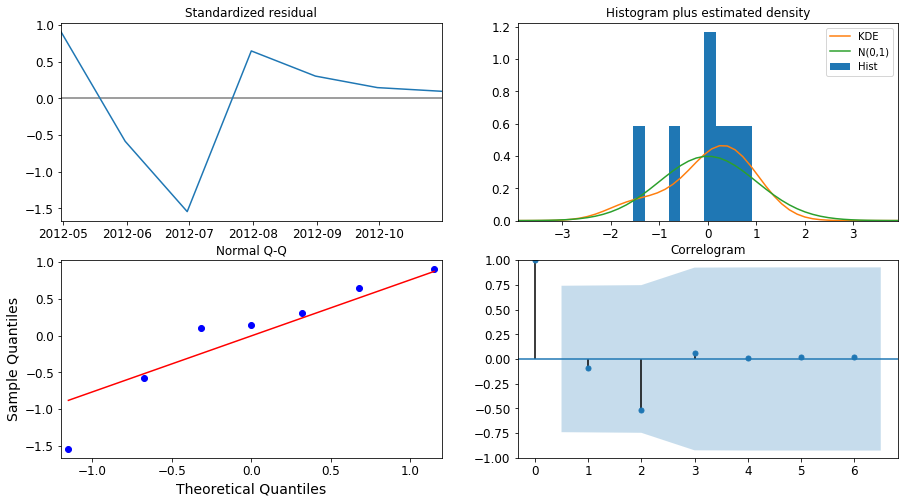

In [20]:
result.plot_diagnostics(lags=6,figsize=(15, 8))
plt.show()

#### Forecasting the sales against true parameters

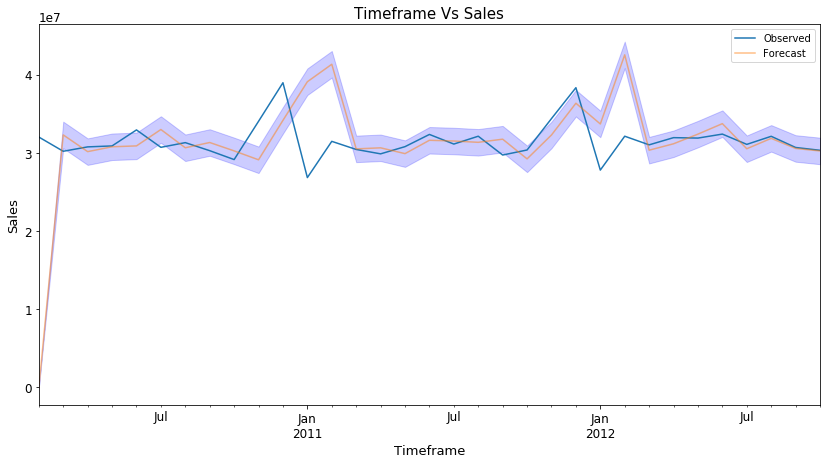

In [21]:
pred = result.get_prediction(start=pd.to_datetime('2010-02-28'), dynamic=False)
pred = result.get_prediction(dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_sales['2010':].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.5, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=.2)
ax.set_xlabel('Timeframe', fontsize = 13)
ax.set_ylabel('Sales', fontsize = 13)
ax.set_title('Timeframe Vs Sales', fontsize = 15)
plt.legend()
plt.show()

#### Mean forecast error

In [24]:
monthly_sales_forecast= pred.predicted_mean
monthly_sales_truth = monthly_sales['2010-05-01':]
mse = ((monthly_sales_forecast - monthly_sales_truth)).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 842113.82
The Root Mean Squared Error of our forecasts is 917.67


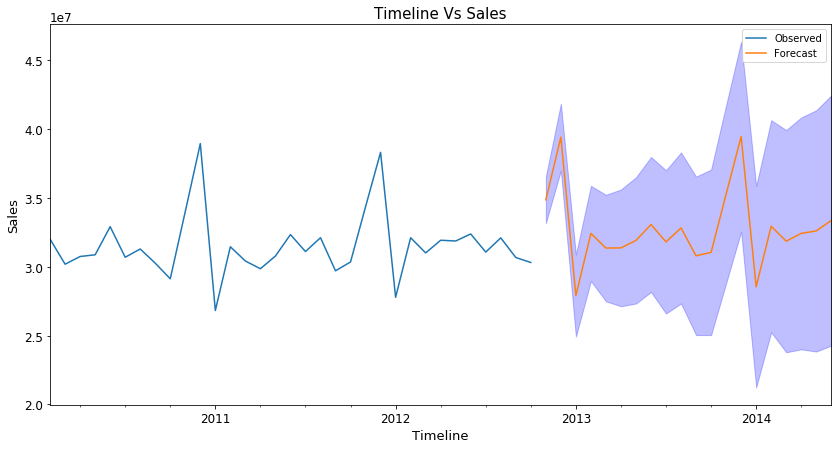

2012-11-30    3.487121e+07
2012-12-31    3.942358e+07
2013-01-31    2.791420e+07
2013-02-28    3.242896e+07
2013-03-31    3.136715e+07
2013-04-30    3.137827e+07
2013-05-31    3.192208e+07
2013-06-30    3.307573e+07
2013-07-31    3.181311e+07
2013-08-31    3.282683e+07
2013-09-30    3.080081e+07
2013-10-31    3.105630e+07
2013-11-30    3.527903e+07
2013-12-31    3.946073e+07
Freq: M, dtype: float64

In [25]:
pred_uc = result.get_forecast(steps=20)

pred_ci = pred_uc.conf_int()
ax = monthly_sales.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.25)
ax.set_xlabel('Timeline', fontsize = 13)
ax.set_ylabel('Sales', fontsize = 13)
ax.set_title('Timeline Vs Sales', fontsize = 15)
plt.legend()
plt.show()

forecast = pred_uc.predicted_mean
forecast.head(14)